# Import Librairies

In [1]:
# Import only the librairies to be used
import pandas as pd
from sklearn.model_selection import train_test_split
#import the remaining librairies to be used

# Import the Data file

In [2]:
# Import the data file
dataset_path = "../../Data/final_dataset_for_model_training/final_dataset.csv"


# final dataset
data = pd.read_csv(dataset_path)



unnamed = ["Unnamed: 0", "Mental Illness.1"]
data.drop(columns = unnamed, inplace= True)
    

# show the dataframe
display(data.head())

,Program Category,Region Served,Age Group,Sex,Religious Preference,Veteran Status,Cultural Group,Serious Mental Illness,Smokes,Diagnosis,...,Household Composition,Employment Status,Mental Illness,Cash Assistance Situation,Education Group,Unknown Insurance Coverage,Insured_or_Not,Has_Public_Insurance,Has_Private_or_Other_Insurance,Confirmed_Medicaid_Managed
0,OUTPATIENT,DOWNSTATE,ADULT,MALE,UNKNOWN,NON-VETERAN/UNKNOWN,Hispanic,YES,NO,MENTAL ILLNESS,...,COHABITANTS,EMPLOYED,YES,No/Unknown,Educated,False,Yes,Yes,No,Yes
1,OUTPATIENT,NEW YORK CITY,ADULT,MALE,RELIGIOUS,NON-VETERAN/UNKNOWN,Majority US,YES,NO,MENTAL ILLNESS,...,LIVES ALONE,EMPLOYED,YES,No/Unknown,Educated,False,Yes,Yes,No,Yes
2,OUTPATIENT,DOWNSTATE,ADULT,MALE,RELIGIOUS,NON-VETERAN/UNKNOWN,Majority US,YES,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,...,COHABITANTS,EMPLOYED,YES,No/Unknown,Educated,False,Yes,Yes,No,Yes
3,COMMUNITY/SUPPORTIVE,NEW YORK CITY,ADULT,MALE,UNKNOWN,NON-VETERAN/UNKNOWN,Unknown,YES,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,...,NOT APPLICABLE/UNKOWN,EMPLOYED,YES,Receiving Cash Assistance,Educated,False,Yes,Yes,No,No
4,OUTPATIENT,UPSTATE,ADULT,FEMALE,SPIRITUAL/NON-RELIGIOUS,NON-VETERAN/UNKNOWN,Majority US,YES,YES,MENTAL ILLNESS,...,COHABITANTS,EMPLOYED,YES,Receiving Cash Assistance,Educated,False,Yes,Yes,No,Yes


In [3]:
data.columns

Index(['Program Category', 'Region Served', 'Age Group', 'Sex',
       'Religious Preference', 'Veteran Status', 'Cultural Group',
       'Serious Mental Illness', 'Smokes', 'Diagnosis', 'Disorder Group',
       'Mental disability', 'Impairment Group', 'Chronical diseases',
       'Users Canabis', 'Smoking treatment', 'Service_drug_alcohol_opiod',
       'Other_testchronic_group', 'Heartchronic', 'Brainchronic',
       'Otherchron_group', 'Household Composition', 'Employment Status',
       'Mental Illness', 'Cash Assistance Situation', 'Education Group',
       'Unknown Insurance Coverage', 'Insured_or_Not', 'Has_Public_Insurance',
       'Has_Private_or_Other_Insurance', 'Confirmed_Medicaid_Managed'],
      dtype='object')

In [4]:
data_b = data.copy()

col = "Serious Mental Illness"

data_b.drop(columns=col, inplace=True)

data_b.columns

Index(['Program Category', 'Region Served', 'Age Group', 'Sex',
       'Religious Preference', 'Veteran Status', 'Cultural Group', 'Smokes',
       'Diagnosis', 'Disorder Group', 'Mental disability', 'Impairment Group',
       'Chronical diseases', 'Users Canabis', 'Smoking treatment',
       'Service_drug_alcohol_opiod', 'Other_testchronic_group', 'Heartchronic',
       'Brainchronic', 'Otherchron_group', 'Household Composition',
       'Employment Status', 'Mental Illness', 'Cash Assistance Situation',
       'Education Group', 'Unknown Insurance Coverage', 'Insured_or_Not',
       'Has_Public_Insurance', 'Has_Private_or_Other_Insurance',
       'Confirmed_Medicaid_Managed'],
      dtype='object')

In [5]:
#final dataset without the biais column
data_b.head()

,Program Category,Region Served,Age Group,Sex,Religious Preference,Veteran Status,Cultural Group,Smokes,Diagnosis,Disorder Group,...,Household Composition,Employment Status,Mental Illness,Cash Assistance Situation,Education Group,Unknown Insurance Coverage,Insured_or_Not,Has_Public_Insurance,Has_Private_or_Other_Insurance,Confirmed_Medicaid_Managed
0,OUTPATIENT,DOWNSTATE,ADULT,MALE,UNKNOWN,NON-VETERAN/UNKNOWN,Hispanic,NO,MENTAL ILLNESS,NO DISORDER,...,COHABITANTS,EMPLOYED,YES,No/Unknown,Educated,False,Yes,Yes,No,Yes
1,OUTPATIENT,NEW YORK CITY,ADULT,MALE,RELIGIOUS,NON-VETERAN/UNKNOWN,Majority US,NO,MENTAL ILLNESS,NO DISORDER,...,LIVES ALONE,EMPLOYED,YES,No/Unknown,Educated,False,Yes,Yes,No,Yes
2,OUTPATIENT,DOWNSTATE,ADULT,MALE,RELIGIOUS,NON-VETERAN/UNKNOWN,Majority US,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,ALCOHOL/DRUG DISORDER,...,COHABITANTS,EMPLOYED,YES,No/Unknown,Educated,False,Yes,Yes,No,Yes
3,COMMUNITY/SUPPORTIVE,NEW YORK CITY,ADULT,MALE,UNKNOWN,NON-VETERAN/UNKNOWN,Unknown,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,ALCOHOL/DRUG DISORDER,...,NOT APPLICABLE/UNKOWN,EMPLOYED,YES,Receiving Cash Assistance,Educated,False,Yes,Yes,No,No
4,OUTPATIENT,UPSTATE,ADULT,FEMALE,SPIRITUAL/NON-RELIGIOUS,NON-VETERAN/UNKNOWN,Majority US,YES,MENTAL ILLNESS,ALCOHOL/DRUG DISORDER,...,COHABITANTS,EMPLOYED,YES,Receiving Cash Assistance,Educated,False,Yes,Yes,No,Yes


# Data Processing

### Vector Encoding (One Hot Encoding)

In [6]:
# function that transform columns with 2 categorical values to dummies [0,1]
def encod(df, col):
    df.loc[:,[col]] = pd.get_dummies(df[col], drop_first=True, dtype=int).values


In [7]:
def encod(df, col):
    dummy_col = pd.get_dummies(df[col], drop_first=True, dtype=int)
    df.drop(columns=[col], inplace=True)
    df[col] = dummy_col.iloc[:, 0].astype(int)  # Add dummy column back with same name


In [8]:
columns = ['Veteran Status', 'Chronical diseases', 'Otherchron_group','Mental Illness','Cash Assistance Situation',
             'Unknown Insurance Coverage', 'Insured_or_Not', 'Has_Public_Insurance',
             'Has_Private_or_Other_Insurance', 'Confirmed_Medicaid_Managed'
       ]

In [9]:
for col in columns:
    encod(data, col)

In [10]:
data_encoded = data.copy()
data_encoded.head()

,Program Category,Region Served,Age Group,Sex,Religious Preference,Cultural Group,Serious Mental Illness,Smokes,Diagnosis,Disorder Group,...,Veteran Status,Chronical diseases,Otherchron_group,Mental Illness,Cash Assistance Situation,Unknown Insurance Coverage,Insured_or_Not,Has_Public_Insurance,Has_Private_or_Other_Insurance,Confirmed_Medicaid_Managed
0,OUTPATIENT,DOWNSTATE,ADULT,MALE,UNKNOWN,Hispanic,YES,NO,MENTAL ILLNESS,NO DISORDER,...,0,1,0,1,0,0,1,1,0,1
1,OUTPATIENT,NEW YORK CITY,ADULT,MALE,RELIGIOUS,Majority US,YES,NO,MENTAL ILLNESS,NO DISORDER,...,0,1,0,1,0,0,1,1,0,1
2,OUTPATIENT,DOWNSTATE,ADULT,MALE,RELIGIOUS,Majority US,YES,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,ALCOHOL/DRUG DISORDER,...,0,1,0,1,0,0,1,1,0,1
3,COMMUNITY/SUPPORTIVE,NEW YORK CITY,ADULT,MALE,UNKNOWN,Unknown,YES,YES,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,ALCOHOL/DRUG DISORDER,...,0,1,0,1,1,0,1,1,0,0
4,OUTPATIENT,UPSTATE,ADULT,FEMALE,SPIRITUAL/NON-RELIGIOUS,Majority US,YES,YES,MENTAL ILLNESS,ALCOHOL/DRUG DISORDER,...,0,0,0,1,1,0,1,1,0,1


In [11]:
#Encode a column with 3 or more categories using one-hot encoding.
#Drops the original column.
#Adds new dummy columns: col_value1, col_value2, etc.

def encode_multiclass_column(df, col, drop_first=True):
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=drop_first, dtype=int)
    df.drop(columns=[col], inplace=True)
    df[dummies.columns] = dummies


In [12]:
for column in data_encoded.columns:
    if column not in columns:
        encode_multiclass_column(data_encoded, column)

In [13]:
data_encoded.head()

,Veteran Status,Chronical diseases,Otherchron_group,Mental Illness,Cash Assistance Situation,Unknown Insurance Coverage,Insured_or_Not,Has_Public_Insurance,Has_Private_or_Other_Insurance,Confirmed_Medicaid_Managed,...,Heartchronic_UNKNOWN,"Heartchronic_YES, HEART CHRONIC ILLNESS",Brainchronic_UNKNOWN,"Brainchronic_YES, BRAIN CHRONIC ILLNESS",Household Composition_LIVES ALONE,Household Composition_NOT APPLICABLE/UNKOWN,Employment Status_NOT IN LABOR FORCE,Employment Status_UNEMPLOYED/UNKNOW,Education Group_Low Educated,Education Group_Others/Unknown
0,0,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data_encoded.columns

Index(['Veteran Status', 'Chronical diseases', 'Otherchron_group',
       'Mental Illness', 'Cash Assistance Situation',
       'Unknown Insurance Coverage', 'Insured_or_Not', 'Has_Public_Insurance',
       'Has_Private_or_Other_Insurance', 'Confirmed_Medicaid_Managed',
       'Program Category_CRISIS/INPATIENT', 'Program Category_OUTPATIENT',
       'Region Served_NEW YORK CITY', 'Region Served_UPSTATE',
       'Age Group_CHILD', 'Age Group_UNKNOWN', 'Sex_MALE', 'Sex_UNKNOWN',
       'Religious Preference_SPIRITUAL/NON-RELIGIOUS',
       'Religious Preference_UNKNOWN', 'Cultural Group_Immigrant/Other Lang',
       'Cultural Group_Majority US', 'Cultural Group_Unknown',
       'Serious Mental Illness_UNKNOWN', 'Serious Mental Illness_YES',
       'Smokes_UNKNOWN', 'Smokes_YES', 'Diagnosis_NO ADDITIONAL DIAGNOSIS',
       'Diagnosis_NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
       'Diagnosis_UNKNOWN', 'Disorder Group_NO DISORDER',
       'Disorder Group_UNKNOWN', 'Mental 

In [15]:
data_encoded.shape[1]

54

# Split the data into train and test set

In [16]:
df_train, df_test = train_test_split(data_encoded,test_size = 0.2)

In [17]:
len(data_encoded), len(df_train), len(df_test)

(194117, 155293, 38824)

In [18]:
# get the values of the columns for the training data
X_train = df_train.drop(columns="Mental Illness").values
y_train = df_train["Mental Illness"].values

In [19]:
# get the values of the columns for the test data
X_test = df_test.drop(columns="Mental Illness").values
y_test = df_test["Mental Illness"].values

# Model Training

=== MLPClassifier Classification Report ===
              precision    recall  f1-score   support

           0       0.58      0.52      0.55      1121
           1       0.99      0.99      0.99     37703

    accuracy                           0.98     38824
   macro avg       0.78      0.76      0.77     38824
weighted avg       0.97      0.98      0.97     38824

Accuracy: 0.9753


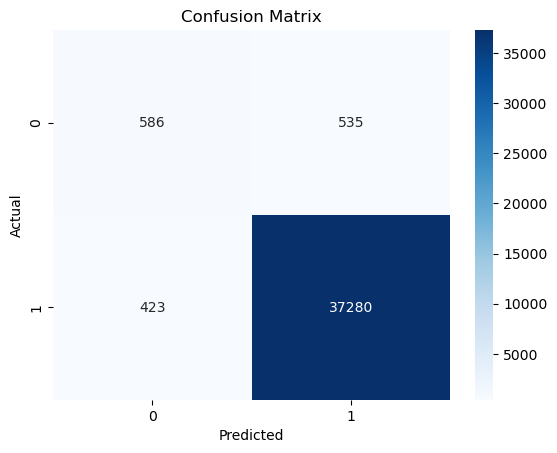

In [20]:
# === Import required libraries ===
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === Load preprocessed data ===
# Assume `data_encoded` is already prepared as per your steps

# === Train-test split ===
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(data_encoded, test_size=0.2, random_state=42)

X_train = df_train.drop(columns="Mental Illness").values
y_train = df_train["Mental Illness"].values
X_test = df_test.drop(columns="Mental Illness").values
y_test = df_test["Mental Illness"].values

# === Train the MLPClassifier ===
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
model.fit(X_train, y_train)

# === Make predictions ===
y_pred = model.predict(X_test)

# === Evaluation metrics ===
print("=== MLPClassifier Classification Report ===")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# === Confusion matrix (visualization) ===
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
# here we train the model on the training data
model.fit(X=X_train, y=y_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

# Model Testing

In [21]:
y_test_predicted = model.predict(X_test)

In [22]:
y_test_predicted

array([0, 1, 1, ..., 1, 1, 1])

In [23]:
y_test

array([0, 1, 1, ..., 1, 1, 1])

In [24]:
(y_test_predicted == y_test).sum()/len(y_test)

0.9753245415207088

# Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
cf = pd.DataFrame(
    columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"]
)

In [27]:
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted)

In [28]:
cf

,y_test_0,y_test_1
y_pred_0,586,535
y_pred_1,423,37280


In [29]:
cf/len(y_test)

,y_test_0,y_test_1
y_pred_0,0.015094,0.01378
y_pred_1,0.010895,0.960231


In [30]:
from sklearn.metrics import recall_score, precision_score

In [31]:
recall_score(y_true=y_test, y_pred=y_test_predicted)

0.9887807336286237

In [36]:
# compute recall manually: TP/TP+FN
#48/(48+16)

In [32]:
precision_score(y_true=y_test, y_pred=y_test_predicted)

0.9858521750628058

In [33]:
# compute precision manually: TP/TP+FP
#48/(48+16)

In [34]:
from sklearn.metrics import classification_report

In [35]:
report =classification_report(y_true=y_test, y_pred=y_test_predicted)

In [36]:
print(report)

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      1121
           1       0.99      0.99      0.99     37703

    accuracy                           0.98     38824
   macro avg       0.78      0.76      0.77     38824
weighted avg       0.97      0.98      0.97     38824



### Model Fine-Tuning: Hyperparameters enhancement

### Model Evaluation 2

# Save the Model

In [39]:
# Saving path
save_path = '../../Models/MLP_model.pkl'

In [40]:
# second method: using pickel (commonly used)
import pickle


In [41]:
# Save the model
with open(save_path, 'wb') as file:
    pickle.dump(model, file)

# To load it later:
# with open('logistic_regression_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)